In [33]:
%cd /home/gianscarpe/dev/event-camera/src

/home/gianscarpe/dev/event-camera/src


In [1]:
ls /home/gianscarpe/dev/exps/voxelgrid/exps_AutoEncoderEstimator/cross-view

09-05-14-28_exp_resnet34_cut_256_pretrained_True_09-05-14-28/  with_errors/
09-07-14-47_exp_resnet34_cut_512_pretrained_True_09-07-14-47/


In [2]:
import experimenting.agents as agents
import pytorch_lightning as pl
import os
import torch
from albumentations import Compose, CenterCrop
from albumentations.pytorch import ToTensor
from importlib import reload  
from experimenting.dataset.core import DHP19Core

exp_name = 'voxelgrid/exps_AutoEncoderEstimator/cross-view/09-05-14-28_exp_resnet34_cut_256_pretrained_True_09-05-14-28/'
checkpoint_dir = f'/home/gianscarpe/dev/exps/{exp_name}/checkpoints'
checkpoints = sorted(os.listdir(checkpoint_dir))
checkpoint_path = os.path.join(checkpoint_dir, checkpoints[0])



In [3]:
print(checkpoint_path)

/home/gianscarpe/dev/exps/voxelgrid/exps_AutoEncoderEstimator/cross-view/09-05-14-28_exp_resnet34_cut_256_pretrained_True_09-05-14-28//checkpoints/epoch=08-val_loss=0.00.ckpt


In [4]:
fmodel = agents.AutoEncoderEstimator.load_from_checkpoint(checkpoint_path)

In [161]:
path = '/data/gscarpellini/nturgb+d_rgb_s018/nturgb+d_rgb/S018C001P044R001A107_rgb/part_0'

In [6]:
path = '/data/gscarpellini/dhp19/time_count_dataset/movements_per_frame'

In [163]:
import numpy as np

In [185]:
def plot_voxel(images, titles):
    voxel_depth = 4
    fig, axs = plt.subplots(nrows=len(images), ncols=voxel_depth, figsize=(voxel_depth*5,10))
    for row in range(len(images)):
        for col in range(voxel_depth):
            plt.sca(axs[row, col])
            plt.axis('off')
            plt.imshow((images[row].squeeze())[col])
            plt.title(f'{titles[row]}_V{col}')

In [14]:
DHP19Core.get_standard_path

<function experimenting.dataset.core.DHP19Core.get_standard_path(subject, session, movement, frame, cam, postfix='')>

In [73]:
DHP19Core.get_standard_path(2, 4, 2, 3, 1)

'S2_session_4_mov_2_frame_3_cam_1.npy'

In [68]:
from matplotlib import pyplot as plt

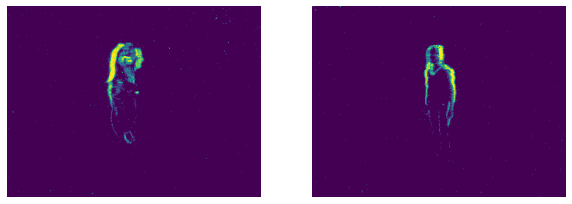

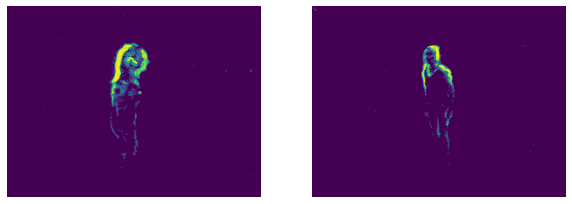

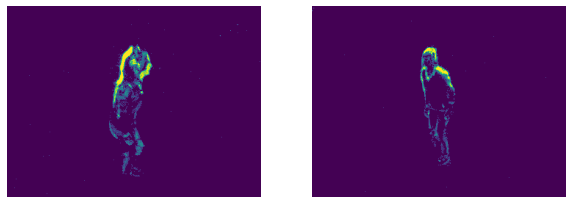

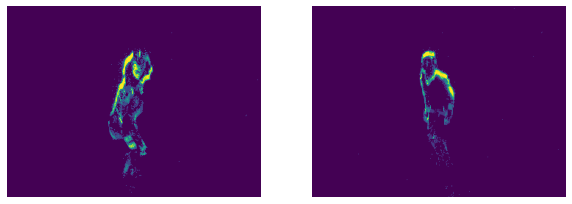

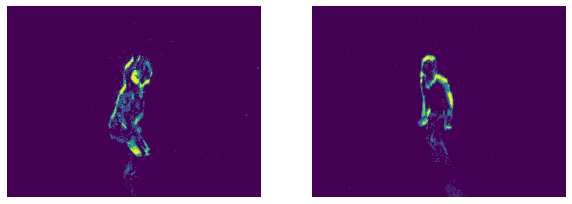

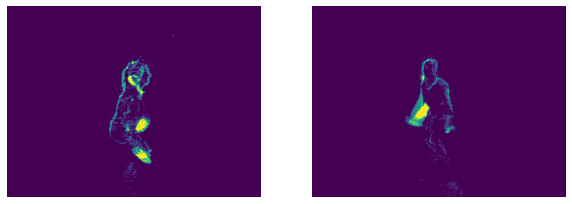

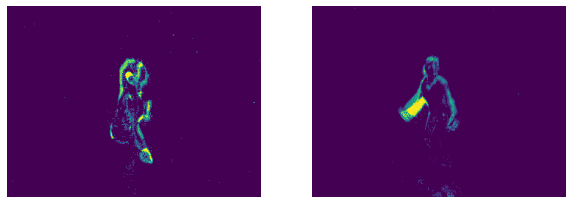

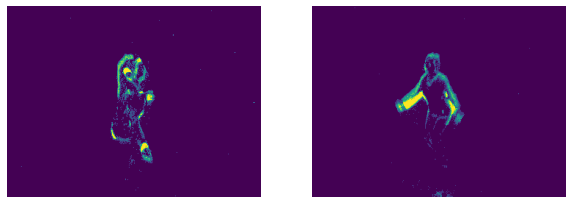

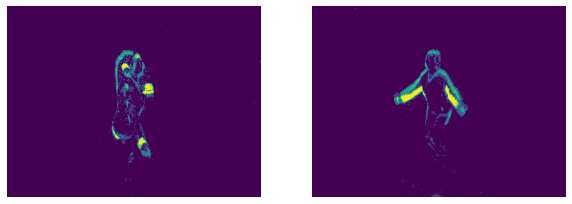

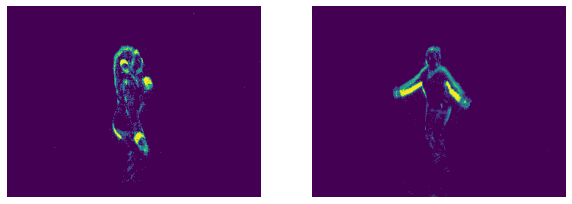

In [91]:
for i in range(10):
    fig, ax = plt.subplots(1, 2, figsize=(10, 20))
    ax[0].axis('off')
    
    x = torch.Tensor(DHP19Core.load_frame(os.path.join(path, DHP19Core.get_standard_path(2, 4, 2, i, 0)))).transpose(-1, 0).transpose(1, -1)
    ax[0].imshow(x.squeeze())
    
    ax[1].axis('off')
    x = torch.Tensor(DHP19Core.load_frame(os.path.join(path, DHP19Core.get_standard_path(2, 4, 2, i, 3)))).transpose(-1, 0).transpose(1, -1)
    ax[1].imshow(x.squeeze())
    

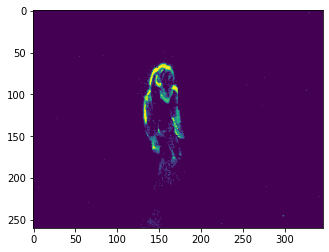

In [27]:
with torch.no_grad():
    count = 0
    for im in sorted(os.listdir(path)):
        if "S1_" not in im:
            continue
        count+=1
        if count > 10:
            break
        x = torch.Tensor(DHP19Core.load_frame(os.path.join(path, im))).transpose(-1, 0).transpose(1, -1)
        x = x.unsqueeze(0)
        out = fmodel(x)
        plot_voxel([x, out], ['input', 'ae'])


RuntimeError: Given groups=1, weight of size [64, 4, 7, 7], expected input[1, 1, 260, 346] to have 4 channels, but got 1 channels instead

In [141]:
from matplotlib import pyplot as plt

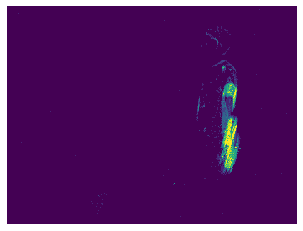

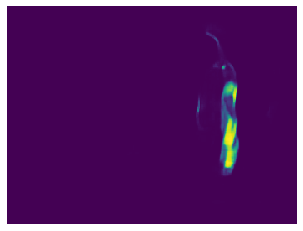

In [145]:
plt.axis('off')
plt.imshow(x.squeeze())
plt.figure()
plt.axis('off')
plt.imshow(out.squeeze())

In [5]:
torch.save(fmodel.model, 'new_ae_resnet34_cut_256_no_aug.pt')